# Getting started

<span style="color:green">Notiz: alles was rot ist, ist noch nicht umgesetzt oder müsste noch überarbeitet werden durch Links etc.</span>

Here we will show a very basic example how to use grandPy to perform [kinetic modeling]. For more vignettes explore the [vignettes folder](
../vignettes/).

We will use data from [[1]](https://www.nature.com/articles/s41586-021-03610-3). These are SLAM-seq data from multiple time points (1h, 2h, 3h, 4h) after infecting Calu-3 cells with SARS-CoV-2 (or mock as control).

First we load the grandPy package and read the GRAND-SLAM that is part of the grandPy package:

In [1]:
from Py.load import * # ANPASSEN
from Py.plot import * # ANPASSEN
sars = read_grand("../data/sars_R.tsv", design=("Condition", "dur.4sU", "Replicate"))
sars = sars.normalize()
print(sars)

Detected dense format -> using dense reader
GrandPy:
Read from sars_R
1045 genes, 12 samples/cells
Available data slots: ['ntr', 'alpha', 'beta', 'count', 'norm']
Available analyses: []
Available plots: {}
Default data slot: norm



C:\Users\Kathi\PycharmProjects\grandpy\Py\utils.py:138: UserWarning: 1 Duplicate gene symbols found: MATR3 (first 5); they have been renamed to ensure uniqueness (e.g., MATR3 → MATR3_1).
  warnings.warn(f"{len(duplicates_list)} Duplicate gene symbols found: {', '.join(duplicates_list[:5])} (first 5); they have been renamed to ensure uniqueness (e.g., MATR3 → MATR3_1).")


The GRAND-SLAM output normally contains any gene with at least 1 read, i.e. > 30k genes. The data set that is part of grandPy has been prefiltered and only consists of 1045 genes. For a complete workflow including filter see the [full vignette](vignette_02_kinetic_modeling.ipynb). Note that we also normalized the read counts (by using size factors), which added an additional data "slot".

<span style="color:red"> We can start by creating a plot showing the kinetics for a gene: ...</span>

Fitting Genes: 100%|██████████| 1/1 [00:00<00:00, 81.44it/s]


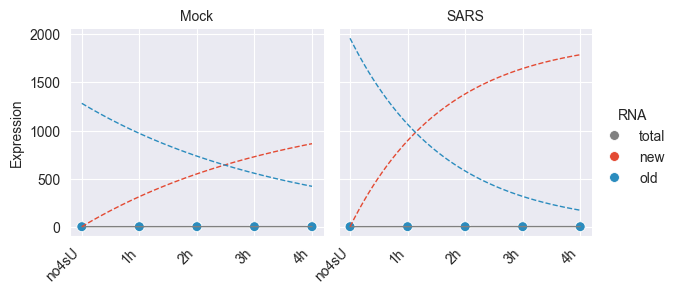

In [7]:
plot_gene_progressive_timecourse(data=sars, gene="SRSF6", slot="ntr", time="duration.4sU.original", exact_tics=True, size=50)

<span style="color:red">Note that this automatically fit the kinetic model for this gene, separately for the two conditions. Modeling used the default data slot, which are the size-factor normalized values, as indicated above. By using the `steady.state` parameter, we defined the mock infected control samples to be in steady state, whereas the virus infected samples should not be assumed to be in steady state. </span>

<span style="color:red"> We now fit the kinetic model for all genes: </span>

In [3]:
sars = sars.fit_kinetics(slot="norm", time=sars.coldata["duration.4sU"].values, return_fields=["Synthesis","Degradation","Half-life"])

Fitting Genes: 100%|██████████| 1045/1045 [00:12<00:00, 82.91it/s]


Modeling results are stored in two “analysis tables”:

In [4]:
print(sars.analyses)

['kinetics_Mock', 'kinetics_SARS']


We can retrieve this table (for more information, see the [data handling vignette](vignette_04_working_with_data_matrices_and_analysis_results):

In [5]:
print(sars.get_analysis_table().head())
# Hier die Abweichung, dass wir zweimal die Spalte Symbols haben, aber sonst würde da ein Index stehen, ganz ohne ging es nicht
# Werte inkorrekt

          Symbol             Gene  Length      Type  Mock_Synthesis  \
Symbol                                                                
UHMK1      UHMK1  ENSG00000152332    8478  Cellular      175.303203   
ATF3        ATF3  ENSG00000162772    2103  Cellular       34.018585   
PABPC4    PABPC4  ENSG00000090621    3592  Cellular      213.387547   
ROR1        ROR1  ENSG00000185483    5832  Cellular      193.670366   
ZC3H11A  ZC3H11A  ENSG00000058673   11825  Cellular      251.705725   

         Mock_Degradation  Mock_Half-life  SARS_Synthesis  SARS_Degradation  \
Symbol                                                                        
UHMK1            0.092302        7.509571      312.386838          0.246338   
ATF3             0.734623        0.943541      484.399168          0.743419   
PABPC4           0.106087        6.533790      525.268077          0.294881   
ROR1             0.194885        3.556701      444.013524          0.409719   
ZC3H11A          0.291714   

We can also easily plot the RNA half-lives of mock infected cells against virus infected cells:

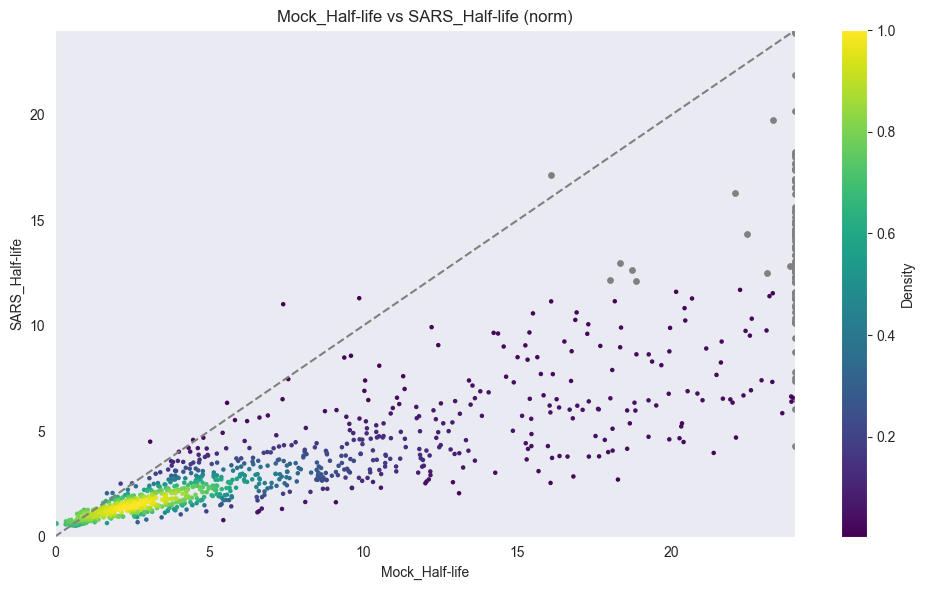

In [6]:
plot_scatter(sars, x="Mock_Half-life", y="SARS_Half-life", limit=(0,24), diagonal=True)
# es wird gleichzeitig gerade eine Liste ausgegeben, die alle Punkte angibt ...)